In [1]:
from generate_test_beam import generate_test_beam, generate_test_images

/home/jp/mambaforge/envs/phase_space_reconstruction/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


tensor([-25.], device='cuda:0') tensor(167.9170, device='cuda:0', dtype=torch.float64)
tensor([-18.6842], device='cuda:0') tensor(100.4050, device='cuda:0', dtype=torch.float64)
tensor([-12.3684], device='cuda:0') tensor(51.0385, device='cuda:0', dtype=torch.float64)
tensor([-6.0526], device='cuda:0') tensor(18.7784, device='cuda:0', dtype=torch.float64)
tensor([0.2632], device='cuda:0') tensor(2.6273, device='cuda:0', dtype=torch.float64)
tensor([6.5789], device='cuda:0') tensor(1.6278, device='cuda:0', dtype=torch.float64)
tensor([12.8947], device='cuda:0') tensor(14.8608, device='cuda:0', dtype=torch.float64)


/home/jp/mambaforge/envs/phase_space_reconstruction/lib/python3.10/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755897462/work/aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


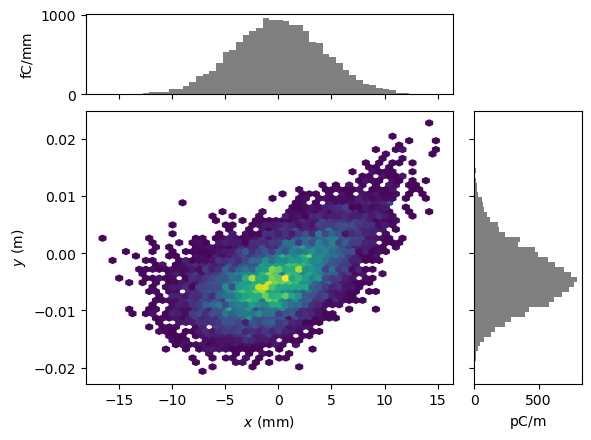

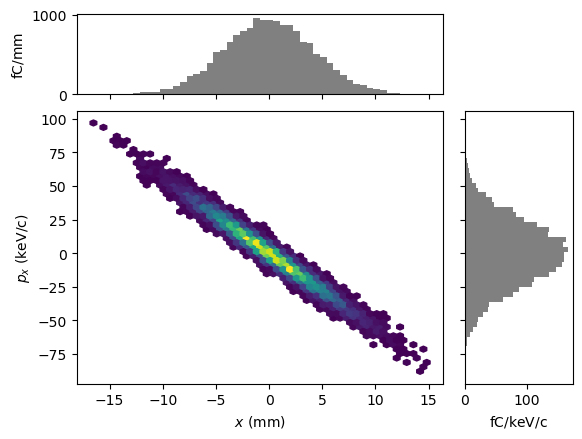

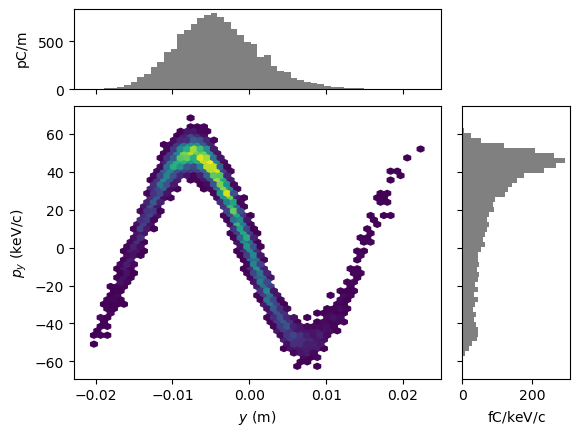

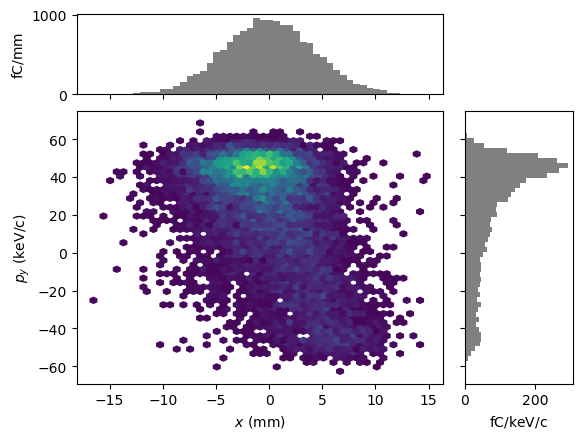

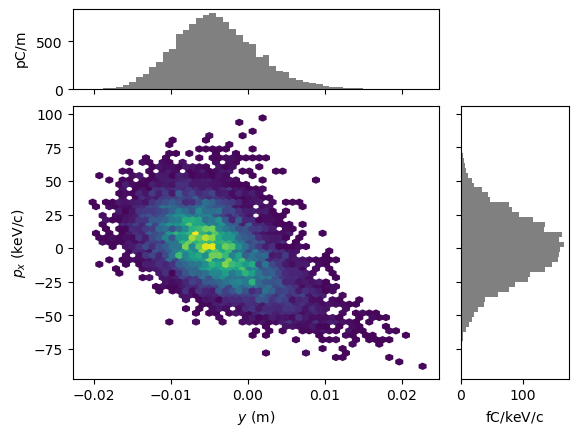

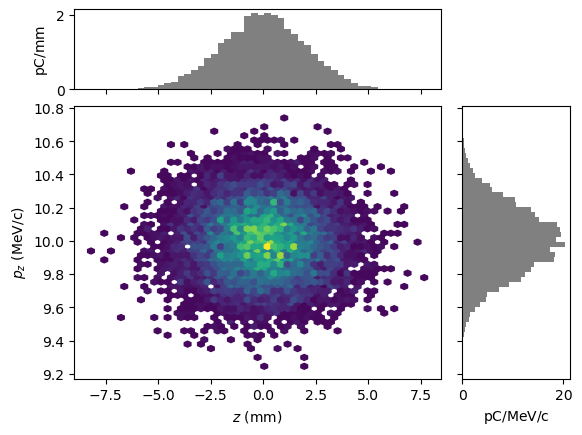

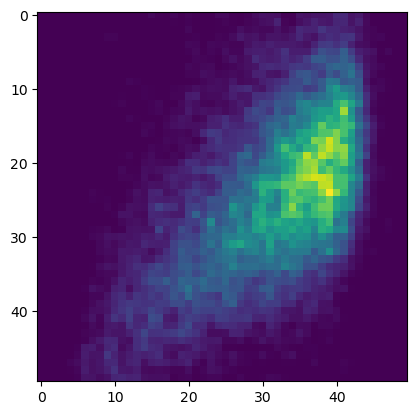

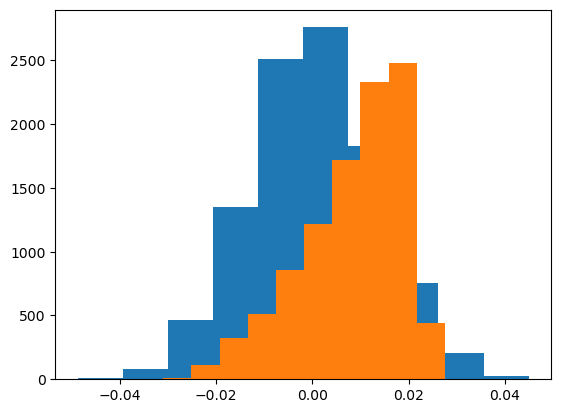

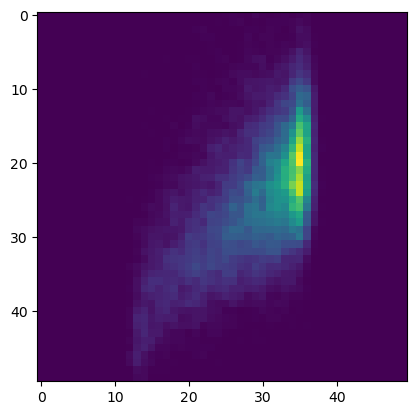

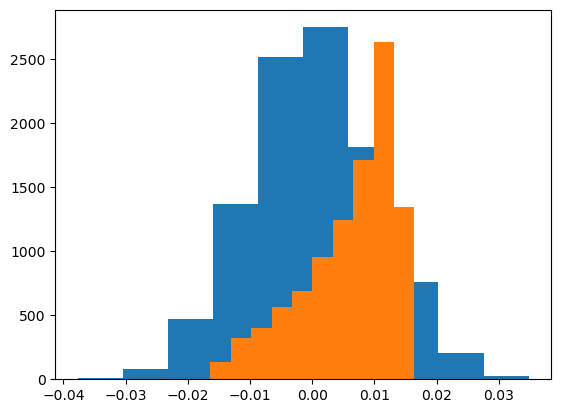

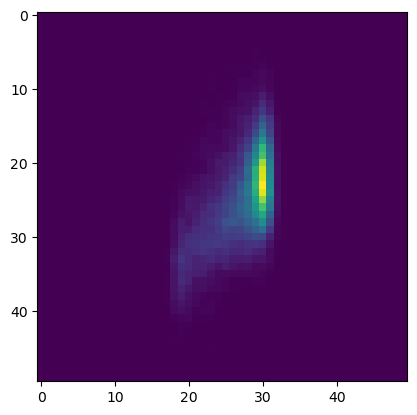

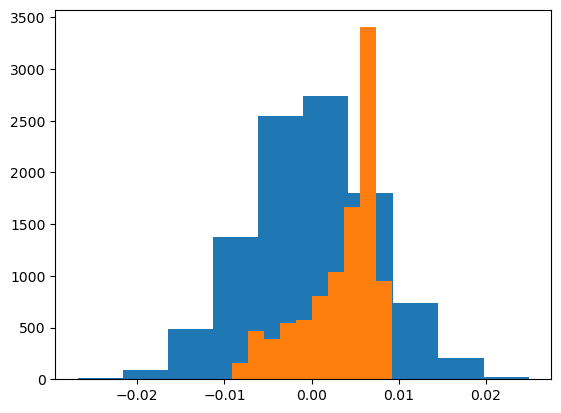

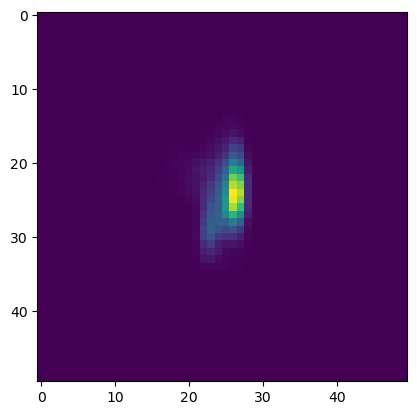

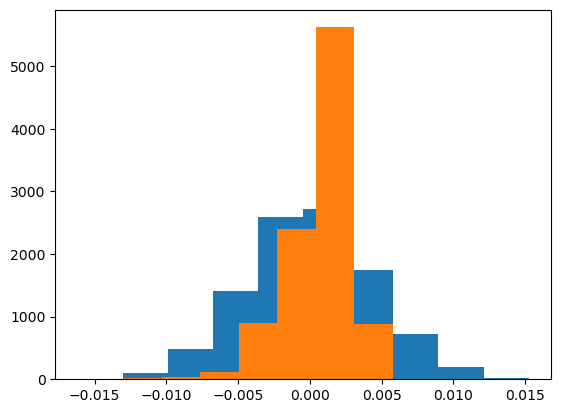

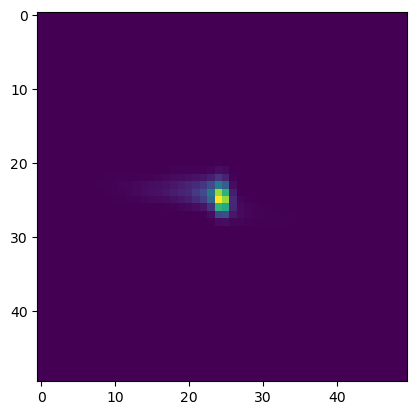

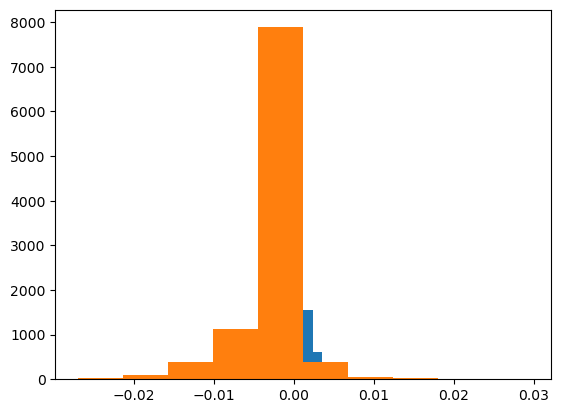

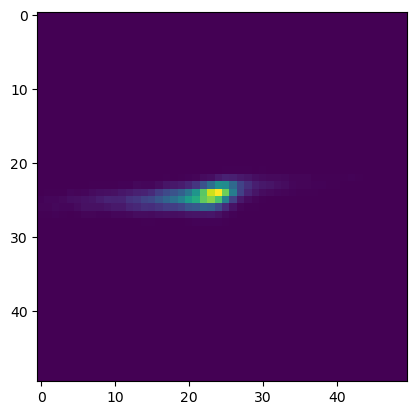

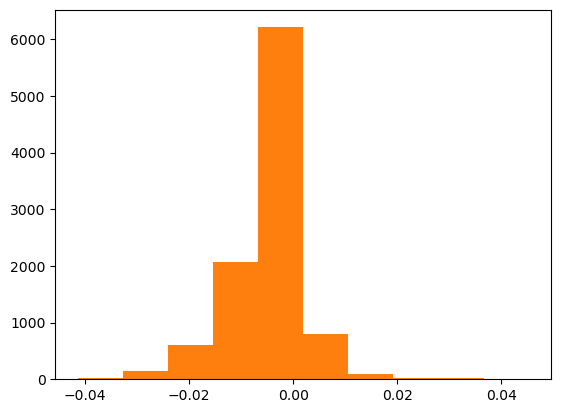

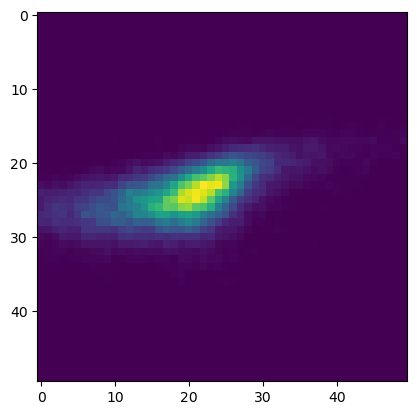

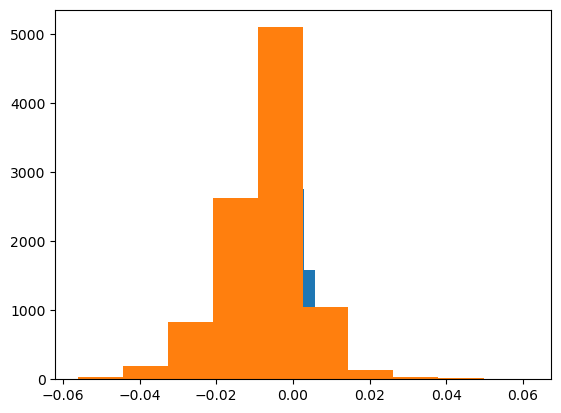

In [2]:
generate_test_images()

In [3]:
import torch
beam_coords = torch.load("ground_truth_dist.pt")
cov = torch.cov(beam_coords.T)

In [4]:
ycov = cov[2:4,2:4]
emit = torch.det(ycov).sqrt()
twiss = ycov / emit
print(f"emit {emit}")
print(f"beta {twiss[0,0]}")
print(f"alpha {-twiss[1,0]}")
print(f"gamma {twiss[1,1]}")

emit 1.1438499113177826e-05
beta 2.5960595899624406
alpha 0.9970241404129312
gamma 0.7681091544570415


In [5]:
xcov = cov[:2,:2]
emit = torch.det(xcov).sqrt()
twiss = xcov / emit
print(f"emit {emit}")
print(f"beta {twiss[0,0]}")
print(f"alpha {-twiss[1,0]}")
print(f"gamma {twiss[1,1]}")

emit 2.008965471149372e-06
beta 8.960731500138124
alpha 4.978065118680678
gamma 2.877123628291716


In [6]:
beam_coords.shape

torch.Size([10000, 6])

In [7]:
bins = torch.load("bins.pt")

In [8]:
bins[1]-bins[0]

tensor(0.0012)

(array([  13.,   88.,  504., 1609., 2638., 2729., 1697.,  586.,  120.,
          16.]),
 array([-0.07551131, -0.06056166, -0.045612  , -0.03066235, -0.0157127 ,
        -0.00076305,  0.01418661,  0.02913626,  0.04408591,  0.05903557,
         0.07398522]),
 <BarContainer object of 10 artists>)

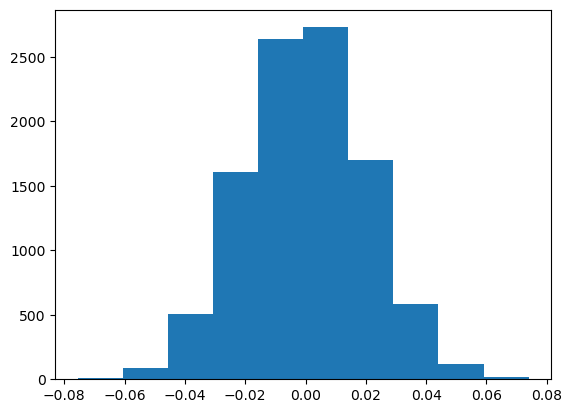

In [9]:
import matplotlib.pyplot as plt
plt.hist(beam_coords.T[-1].numpy())

In [10]:
from fitting import train_single_model

0 tensor(62842204., device='cuda:0', grad_fn=<MulBackward0>)
100 tensor(5005480., device='cuda:0', grad_fn=<MulBackward0>)
200 tensor(4810111., device='cuda:0', grad_fn=<MulBackward0>)
300 tensor(5882675., device='cuda:0', grad_fn=<MulBackward0>)
400 tensor(4204966.5000, device='cuda:0', grad_fn=<MulBackward0>)
500 tensor(4358551., device='cuda:0', grad_fn=<MulBackward0>)
600 tensor(3969865.7500, device='cuda:0', grad_fn=<MulBackward0>)
700 tensor(3542922., device='cuda:0', grad_fn=<MulBackward0>)
800 tensor(3854100.7500, device='cuda:0', grad_fn=<MulBackward0>)
900 tensor(3170689.2500, device='cuda:0', grad_fn=<MulBackward0>)


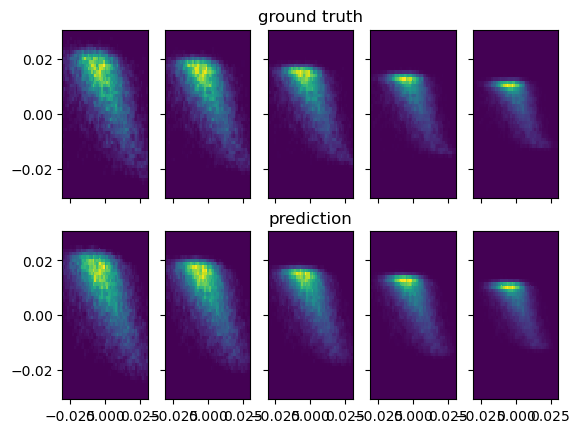

In [11]:
train_single_model()